## Syntax Complexity and Readability Across Genres in the Brown Corpus
#### LING 250

### Import necessary packages

In [1]:
import nltk
nltk.download('brown')
nltk.download('punkt')
from nltk.corpus import brown
from nltk import sent_tokenize, word_tokenize
import textstat
from nltk.tokenize import sent_tokenize
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import random

[nltk_data] Downloading package brown to
[nltk_data]     /Users/felix.hammond/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/felix.hammond/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Define genres and function to calculate readability measures

In [2]:
# list of all chosen genres
genres = ['learned', 'hobbies', 'government', 'religion', 'news',
          'fiction', 'mystery', 'adventure', 'romance', 'humor']

# load easy word list
with open('dale-chall-3000-words.txt', 'r') as f:
    easy_words = set(word.strip().lower() for line in f for word in line.split())

def percentage_difficult_words(category):
    # Get words for the category
    words_in_category = brown.words(categories=category)
    
    # Clean up: lowercase, remove punctuation
    words_clean = [w.lower() for w in words_in_category if w.isalpha()]
    
    total_words = len(words_clean)
    
    difficult_words = [w for w in words_clean if w not in easy_words]
    num_difficult = len(difficult_words)
    
    if total_words == 0:
        return 0
    else:
        return (num_difficult / total_words) * 100

difficulty_percentages = {}

for genre in genres:
    difficulty_percentages[genre] = percentage_difficult_words(genre)

# show results
for genre, pct in difficulty_percentages.items():
    print(f"{genre.capitalize()}: {pct:.2f}% difficult words")

Learned: 37.17% difficult words
Hobbies: 32.27% difficult words
Government: 36.89% difficult words
Religion: 29.94% difficult words
News: 34.75% difficult words
Fiction: 23.99% difficult words
Mystery: 22.46% difficult words
Adventure: 24.09% difficult words
Romance: 22.93% difficult words
Humor: 27.79% difficult words


In [3]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Replace fancy quotes with normal ones
    text = text.replace('’', "'").replace('“', '"').replace('”', '"')
    # Keep words and apostrophes inside words, remove everything else
    text = re.sub(r"[^a-zA-Z'\s]", '', text)
    return text

def compute_dale_chall(text, easy_words):
    words = text.split()
    
    # Clean up: lowercase, remove punctuation
    words_clean = [w.lower() for w in words if w.isalpha()]
    
    
    difficult_words = [w for w in words_clean if w not in easy_words]
    sentences = sent_tokenize(text)
    num_sentences = len(sentences)
    avg_sentence_length = textstat.avg_sentence_length(text)
    text = clean_text(text)
    words = text.split()
    total_words = len(words)

    difficult_word_pct = (len(difficult_words) / total_words) * 100


    raw_score = (0.1579 * difficult_word_pct) + (0.0496 * avg_sentence_length)
    if difficult_word_pct > 5:
        raw_score += 3.6365

    return round(raw_score, 2)

# Function to get full text from a genre
def get_text_from_genre(genre):
    words = brown.words(categories=genre)
    text = ' '.join(words)
    return text

readability_scores = {}

for genre in genres:
    text = get_text_from_genre(genre)
    
    # Compute scores
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
    dale_chall_score = compute_dale_chall(text, easy_words)
    avg_sentence_length = textstat.avg_sentence_length(text)

    # Print results
    print(f"\n=== {genre.upper()} ===")
    print("Flesch Reading Ease:", flesch_reading_ease)
    print("Flesch-Kincaid Grade:", flesch_kincaid_grade)
    print("Dale-Chall Score:", dale_chall_score)
    print("Avg Sentence Length:", avg_sentence_length)
    
    # Save results to dictionary
    readability_scores[genre] = {
        'Flesch Reading Ease': flesch_reading_ease,
        'Flesch-Kincaid Grade': flesch_kincaid_grade,
        'Dale-Chall Score': dale_chall_score,
        'Avg Sentence Length': avg_sentence_length
    }


=== LEARNED ===
Flesch Reading Ease: 40.08
Flesch-Kincaid Grade: 13.3
Dale-Chall Score: 10.5
Avg Sentence Length: 22.6

=== HOBBIES ===
Flesch Reading Ease: 52.6
Flesch-Kincaid Grade: 10.5
Dale-Chall Score: 9.5
Avg Sentence Length: 18.6

=== GOVERNMENT ===
Flesch Reading Ease: 38.86
Flesch-Kincaid Grade: 13.8
Dale-Chall Score: 10.52
Avg Sentence Length: 23.8

=== RELIGION ===
Flesch Reading Ease: 47.62
Flesch-Kincaid Grade: 12.5
Dale-Chall Score: 9.44
Avg Sentence Length: 23.5

=== NEWS ===
Flesch Reading Ease: 53.21
Flesch-Kincaid Grade: 10.3
Dale-Chall Score: 9.75
Avg Sentence Length: 18.0

=== FICTION ===
Flesch Reading Ease: 73.27
Flesch-Kincaid Grade: 6.7
Dale-Chall Score: 8.04
Avg Sentence Length: 14.9

=== MYSTERY ===
Flesch Reading Ease: 83.15
Flesch-Kincaid Grade: 5.0
Dale-Chall Score: 7.68
Avg Sentence Length: 13.5

=== ADVENTURE ===
Flesch Reading Ease: 82.95
Flesch-Kincaid Grade: 5.1
Dale-Chall Score: 7.94
Avg Sentence Length: 13.7

=== ROMANCE ===
Flesch Reading Ease: 73.

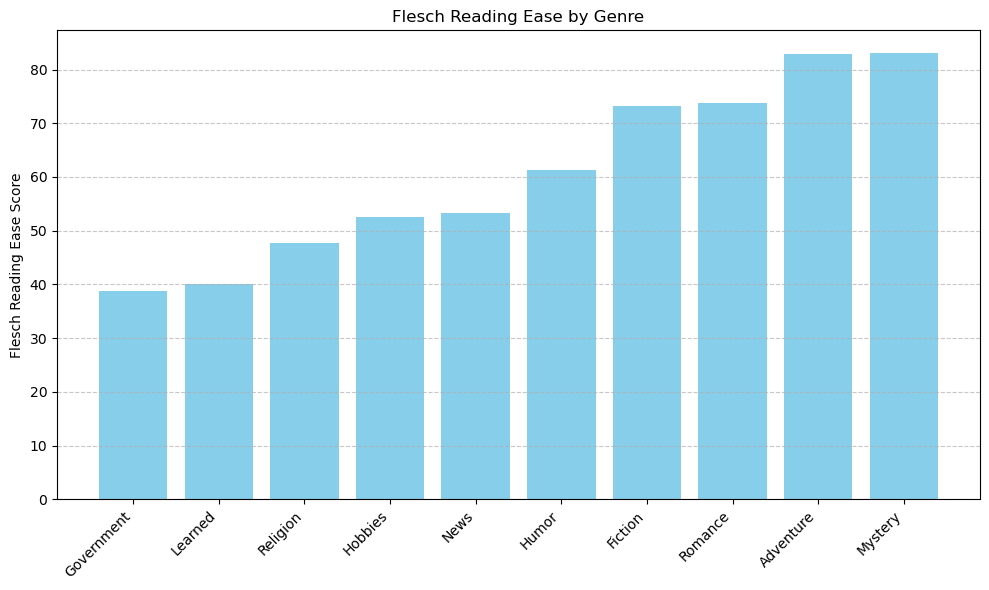

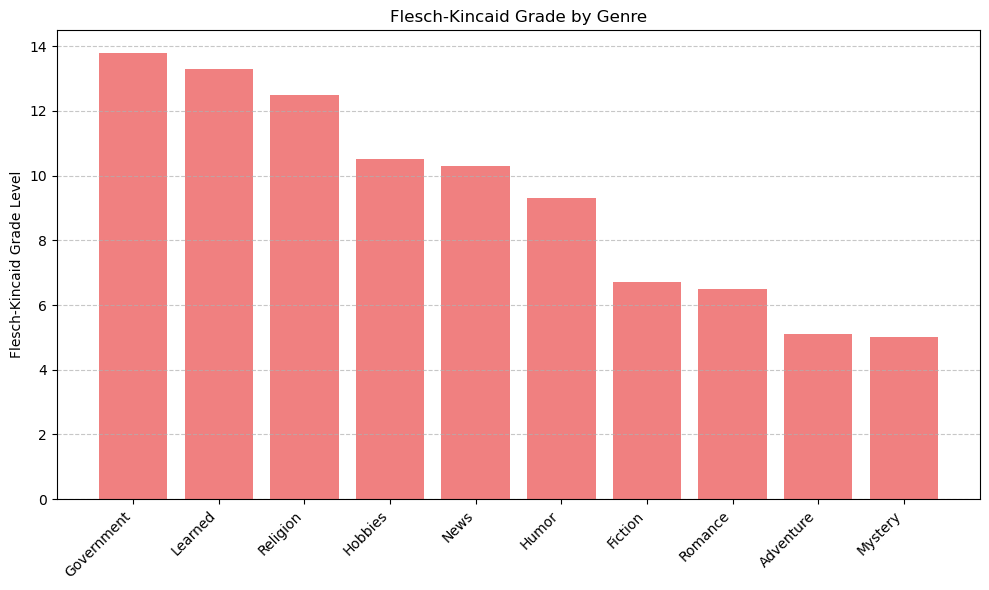

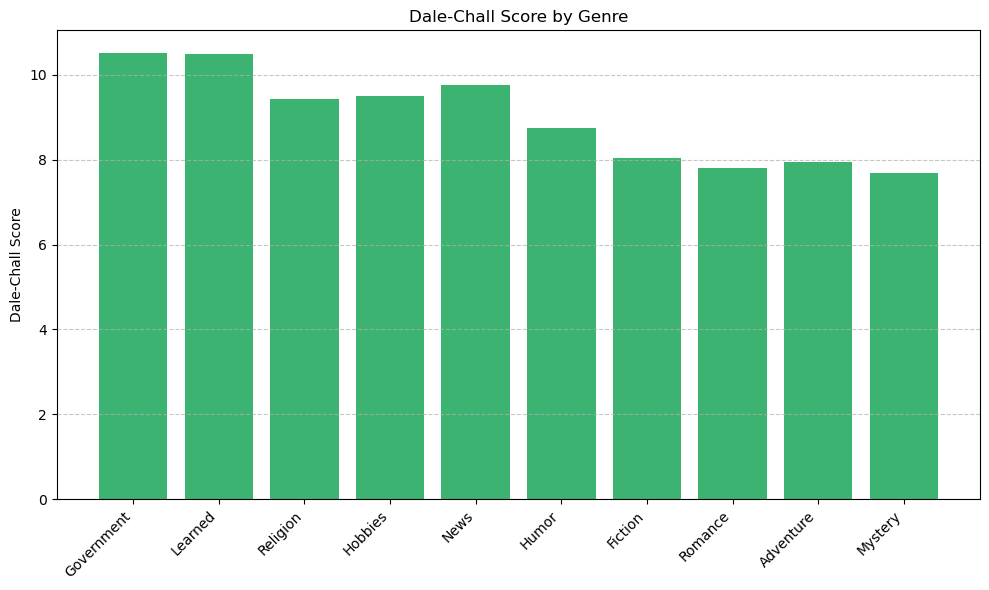

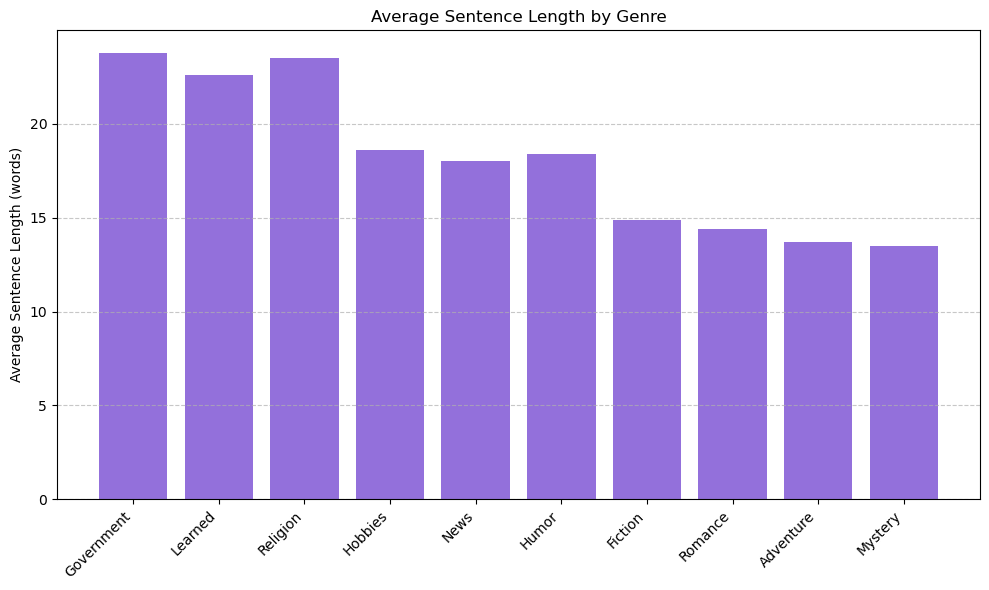

In [4]:
data = {
    'Genre': ['Learned', 'Hobbies', 'Government', 'Religion', 'News', 
              'Fiction', 'Mystery', 'Adventure', 'Romance', 'Humor'],
    'Flesch_Reading_Ease': [40.08, 52.6, 38.86, 47.62, 53.21, 
                            73.27, 83.15, 82.95, 73.78, 61.26],
    'Flesch_Kincaid_Grade': [13.3, 10.5, 13.8, 12.5, 10.3, 
                             6.7, 5.0, 5.1, 6.5, 9.3],
    'Dale_Chall_Score': [10.5, 9.5, 10.52, 9.44, 9.75, 
                         8.04, 7.68, 7.94, 7.8, 8.74],
    'Avg_Sentence_Length': [22.6, 18.6, 23.8, 23.5, 18.0, 
                            14.9, 13.5, 13.7, 14.4, 18.4]
}

df = pd.DataFrame(data)

# Sort by Flesch-Kincaid Grade Level (highest to lowest)
df_sorted = df.sort_values(by='Flesch_Kincaid_Grade', ascending=False)

# Plot: Flesch Reading Ease
plt.figure(figsize=(10,6))
plt.bar(df_sorted['Genre'], df_sorted['Flesch_Reading_Ease'], color='skyblue')
plt.ylabel('Flesch Reading Ease Score')
plt.title('Flesch Reading Ease by Genre')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('flesch_ease.png')
plt.show()

# Plot: Flesch-Kincaid Grade Level
plt.figure(figsize=(10,6))
plt.bar(df_sorted['Genre'], df_sorted['Flesch_Kincaid_Grade'], color='lightcoral')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.title('Flesch-Kincaid Grade by Genre')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('flesch_grade.png')
plt.show()

# Plot: Dale-Chall Score
plt.figure(figsize=(10,6))
plt.bar(df_sorted['Genre'], df_sorted['Dale_Chall_Score'], color='mediumseagreen')
plt.ylabel('Dale-Chall Score')
plt.title('Dale-Chall Score by Genre')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('dale_chall.png')
plt.show()

# Plot: Average Sentence Length
plt.figure(figsize=(10,6))
plt.bar(df_sorted['Genre'], df_sorted['Avg_Sentence_Length'], color='mediumpurple')
plt.ylabel('Average Sentence Length (words)')
plt.title('Average Sentence Length by Genre')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('sentence_length.png')
plt.show()

### Get random sentences from genre

In [5]:
def get_random_sentences(genre, n=5):
    # Get all sentences for the genre
    sentences = brown.sents(categories=genre)
    
    # Randomly sample n sentences
    random_sentences = random.sample(sorted(sentences), n)
    
    # Join words into actual strings
    joined_sentences = [' '.join(sentence) for sentence in random_sentences]
    
    return joined_sentences

example_sentences = get_random_sentences('humor')
for i, sent in enumerate(example_sentences, 1):
    print(f"{i}. {sent}")

1. `` You what '' ? ?
2. Mother even went so far as to trump up for me matrimonial opportunities with Pasadena debs who had been educated abroad , and with those of the more lenient Los Angeles area where a debutante was a girl who had been to high school .
3. disturbing , as when one says that a friend is acting funny ; ;
4. It was General Burnside's horse running in a circle .
5. My uncle looked at Mr. Gorboduc .


### Get random sample for statistical testing

In [6]:
def get_random_sample(text, num_sentences=5):
    sentences = sent_tokenize(text)  # Tokenize the text into sentences using nltk's sent_tokenize
    random_sentences = random.sample(sentences, num_sentences)  # Randomly sample sentences
    return ' '.join(random_sentences)  # Join them back into a chunk of text

### Get readability scores from sample

In [7]:
def get_readability_scores(text):
    scores = {
        'Flesch Reading Ease': textstat.flesch_reading_ease(text),
        'Flesch-Kincaid Grade': textstat.flesch_kincaid_grade(text),
        'Dale-Chall Score': compute_dale_chall(text, easy_words),
        'Avg Sentence Length': textstat.avg_sentence_length(text)
    }
    return scores

### ANOVA

In [8]:
# Collect the sampled readability scores in a dictionary
samples_scores = {genre: [] for genre in genres}

# Sample and calculate scores for each genre
for genre in genres:
    text = get_text_from_genre(genre)
    for _ in range(20):  # Take n random samples from each genre
        sampled_text = get_random_sample(text, num_sentences=10)  # Customize num_sentences if needed
        scores = get_readability_scores(sampled_text)
        samples_scores[genre].append(scores['Dale-Chall Score'])

# Prepare data for ANOVA
anova_data = pd.DataFrame(samples_scores)

# Perform ANOVA (F-Test)
f_stat, p_val = stats.f_oneway(*[anova_data[genre] for genre in genres])

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 74.5205990895126
p-value: 1.5439052949888974e-57


In [9]:
# Collect the sampled readability scores in a dictionary
samples_scores = {genre: [] for genre in genres}

# Sample and calculate scores for each genre
for genre in genres:
    text = get_text_from_genre(genre)
    for _ in range(20):  # Take n random samples from each genre
        sampled_text = get_random_sample(text, num_sentences=10)  # Customize num_sentences if needed
        scores = get_readability_scores(sampled_text)
        samples_scores[genre].append(scores['Flesch-Kincaid Grade'])

# Prepare data for ANOVA
anova_data = pd.DataFrame(samples_scores)

# Perform ANOVA (F-Test)
f_stat, p_val = stats.f_oneway(*[anova_data[genre] for genre in genres])

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 73.68217321547645
p-value: 3.5332297431097717e-57


In [10]:
anova_data

,learned,hobbies,government,religion,news,fiction,mystery,adventure,romance,humor
0,12.9,11.6,10.6,15.5,9.6,8.2,5.5,5.8,4.0,5.8
1,11.9,10.8,14.9,13.5,8.4,5.1,5.7,7.8,9.0,7.3
2,14.0,8.7,15.7,12.8,8.0,6.5,3.2,6.5,6.8,9.1
3,12.3,9.1,14.3,12.2,10.0,7.8,4.6,8.0,1.9,10.0
4,11.6,9.1,10.6,11.4,11.7,7.3,5.6,2.5,5.2,6.8
5,13.2,8.7,12.9,12.6,9.9,6.3,7.0,5.1,6.0,12.6
6,14.6,7.1,15.3,11.2,10.2,7.0,4.0,6.4,5.6,8.3
7,13.6,10.1,10.9,14.2,13.1,3.3,4.4,5.4,6.0,10.1
8,11.5,11.5,13.4,10.3,8.8,6.4,4.2,5.6,5.7,8.3
9,10.8,7.7,14.8,12.8,11.6,6.9,3.8,6.6,7.3,6.5


### t-tests between genres

In [11]:
# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(samples_scores['learned'], samples_scores['fiction'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 14.388463933605287
P-value: 5.815757457323696e-17


In [12]:
# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(samples_scores['learned'], samples_scores['government'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -0.464218327760023
P-value: 0.6451399703560787


In [13]:
# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(samples_scores['fiction'], samples_scores['romance'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 1.0246389027573308
P-value: 0.3120123896440492


### Count words and sentences

In [14]:
def count_words_and_sentences(text):
    sentences = sent_tokenize(text)  # Tokenize the text into sentences
    words = word_tokenize(text)  # Tokenize the text into words
    
    # Filter out punctuation and numbers from word tokens
    words = [word for word in words if word.isalpha()]
    
    return len(words), len(sentences)

# Prepare a dictionary to hold the results
genre_data = {}

# Loop through each genre and calculate the number of words and sentences
for genre in genres:
    text = get_text_from_genre(genre)
    num_words, num_sentences = count_words_and_sentences(text)
    genre_data[genre] = {'Number of Words': num_words, 'Number of Sentences': num_sentences}

# Convert the dictionary to a pandas DataFrame
word_df = pd.DataFrame(genre_data).T  # Transpose to get genres as rows

In [15]:
word_df

,Number of Words,Number of Sentences
learned,157984,7352
hobbies,70430,3991
government,60312,2647
religion,34109,1596
news,84650,4308
fiction,57930,4493
mystery,47802,4103
adventure,57949,4899
romance,58220,4744
humor,18057,1118


### t-test between Fiction and Nonfiction

In [16]:
# Fiction and nonfiction genre groups
fiction_genres = ['fiction', 'mystery', 'adventure', 'romance']
nonfiction_genres = ['learned', 'hobbies', 'religion', 'government', 'news']

# Function to sample a chunk of text and calculate a readability score
def sample_readability(genre, sample_size=500):
    text = get_text_from_genre(genre)
    sentences = sent_tokenize(text)
    sampled_text = ' '.join(random.choices(sentences, k=min(len(sentences), sample_size)))
    return textstat.flesch_kincaid_grade(sampled_text)  # Or any other readability metric you want

# Collect readability scores
fiction_scores = []
nonfiction_scores = []

samples_per_genre = 10  # Number of samples to take per genre

for genre in fiction_genres:
    for _ in range(samples_per_genre):
        fiction_scores.append(sample_readability(genre))

for genre in nonfiction_genres:
    for _ in range(samples_per_genre):
        nonfiction_scores.append(sample_readability(genre))

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(fiction_scores, nonfiction_scores, equal_var=False)

print("T-Statistic:", round(t_stat, 5))
print("P-Value:", p_value)

if p_value < 0.05:
    print("Result: Reject the null hypothesis — readability differs between fiction and nonfiction.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference.")


T-Statistic: -23.75647
P-Value: 1.383505858922514e-37
Result: Reject the null hypothesis — readability differs between fiction and nonfiction.


### ANOVA for Fiction

In [29]:
# Collect the sampled readability scores in a dictionary
samples_scores = {genre: [] for genre in fiction_genres}

# Sample and calculate scores for each genre
for genre in fiction_genres:
    text = get_text_from_genre(genre)
    for _ in range(20):  # Take n random samples from each genre
        sampled_text = get_random_sample(text, num_sentences=10)  # Customize num_sentences if needed
        scores = get_readability_scores(sampled_text)
        samples_scores[genre].append(scores['Dale-Chall Score'])

# Prepare data for ANOVA
anova_data = pd.DataFrame(samples_scores)

# Perform ANOVA (F-Test)
f_stat, p_val = stats.f_oneway(*[anova_data[genre] for genre in fiction_genres])

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 0.960516919112547
p-value: 0.41586754584295915


### ANOVA for Nonfiction

In [28]:
# Collect the sampled readability scores in a dictionary
samples_scores = {genre: [] for genre in nonfiction_genres}

# Sample and calculate scores for each genre
for genre in nonfiction_genres:
    text = get_text_from_genre(genre)
    for _ in range(20):  # Take n random samples from each genre
        sampled_text = get_random_sample(text, num_sentences=10)  # Customize num_sentences if needed
        scores = get_readability_scores(sampled_text)
        samples_scores[genre].append(scores['Dale-Chall Score'])

# Prepare data for ANOVA
anova_data = pd.DataFrame(samples_scores)

# Perform ANOVA (F-Test)
f_stat, p_val = stats.f_oneway(*[anova_data[genre] for genre in nonfiction_genres])

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 10.457643569534115
p-value: 4.6142232246816026e-07
